# Data Acquisition



In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
penguins=pd.read_csv("palmer_penguins.csv")

# Exploratory Analysis

We first wanted to find which quantitative features from the penguins data set appeared to be the most distinguishable between species. We found the means of each feature of each species of penguins and from the summary table, we discovered that between the three species that **Culmen Length** and **Culmen Depth** were the best distinguishable features between species, keeping in mind that these two features were measued in *millimeters* (a small difference in the average is actually a lot more than it seems in comparison to other features). Using the summary table, the variation between Culmen Length and Culmen Depth for different species is apparent.

In [5]:
penguins.groupby(["Species"])[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)',
                                        'Delta 15 N (o/oo)','Delta 13 C (o/oo)','Body Mass (g)']].mean()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.791391,18.346358,189.953642,8.859733,-25.804194,3700.662252
Chinstrap penguin (Pygoscelis antarctica),48.833824,18.420588,195.823529,9.356155,-24.546542,3733.088235
Gentoo penguin (Pygoscelis papua),47.504878,14.982114,217.186992,8.245338,-26.185298,5076.016260


We now have our two best quantitative variables to distinguish between penguin species. We then explored the differences between qualitative variables: **Island** and **Sex** . We noticed based on the table that Chinstrap penguins and Gentoo Penguins are exclusive to their own island, demonstrating that **Island** would be a strong qualitative feature when trying to predict a specific species. On the other hand, **Sex** of the penguins is inclusive of all the species which would be less effective if ultimately using this variable trying to predict a specific species.Therefore, overall we decided that **Island** would be a better predictor. From looking at the summary table using both **Island** and **Sex**, we can see that within species of penguins, the averages of features varies (so theoretically they could both work). However, despite sex being a decent predictor with difference in values, the fact that two-thirds of the species is exclusive to a single **Island** outweighs this difference when trying to predict a species of penguin.

In [6]:
penguins.groupby(["Species","Island"])[['Culmen Length (mm)','Culmen Depth (mm)']].mean()

Culmen Length (mm)  \
Species                                   Island                          
Adelie Penguin (Pygoscelis adeliae)       Biscoe              38.975000   
                                          Dream               38.501786   
                                          Torgersen           38.950980   
Chinstrap penguin (Pygoscelis antarctica) Dream               48.833824   
Gentoo penguin (Pygoscelis papua)         Biscoe              47.504878   

                                                     Culmen Depth (mm)  
Species                                   Island                        
Adelie Penguin (Pygoscelis adeliae)       Biscoe             18.370455  
                                          Dream              18.251786  
                                          Torgersen          18.429412  
Chinstrap penguin (Pygoscelis antarctica) Dream              18.420588  
Gentoo penguin (Pygoscelis papua)         Biscoe             14.982114

In [7]:
penguins.groupby(["Species","Sex"])[['Culmen Length (mm)','Culmen Depth (mm)']].mean()

Culmen Length (mm)  \
Species                                   Sex                          
Adelie Penguin (Pygoscelis adeliae)       FEMALE           37.257534   
                                          MALE             40.390411   
Chinstrap penguin (Pygoscelis antarctica) FEMALE           46.573529   
                                          MALE             51.094118   
Gentoo penguin (Pygoscelis papua)         .                44.500000   
                                          FEMALE           45.563793   
                                          MALE             49.473770   

                                                  Culmen Depth (mm)  
Species                                   Sex                        
Adelie Penguin (Pygoscelis adeliae)       FEMALE          17.621918  
                                          MALE            19.072603  
Chinstrap penguin (Pygoscelis antarctica) FEMALE          17.588235  
                                          MALE            19.252941  
Gentoo penguin (Pygoscelis papua)         .               15.700000  
                                          FEMALE          14.237931  
                                          MALE            15.718033

From our summary tables, we wanted to further prove that **Culmen Length** and **Culmen Depth** were effective at being quantiative predictors of species. We decided to use histograms as there were the most effective method in demonstrating the differences between species and quantitative features **Culmen Length** and **Culmen Depth**.

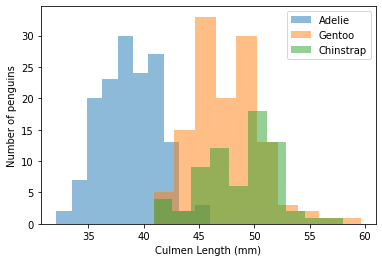

In [8]:
# Making a histogram grouped by species, of Culmen Lengths

fig,ax = plt.subplots(1)
ax.set(xlabel='Culmen Length (mm)',ylabel='Number of penguins')

# sets species as a set of the three specires of penguins
species= set(penguins['Species'])
for s in species:
    # subdivides data by species iterating through set s
    sub=penguins[penguins['Species']==s] 
    # drops nan values
    sub=sub['Culmen Length (mm)'].dropna() 
    ax.hist(sub, label=s.split(' ')[0], alpha=.5) 
    ax.legend()

The Histogram shows that there is great variation between species when it comes to the **Culmen Length**  as much of the species don't seem to overlap much; therefore proving that **Culmen Length** in fact is an effective quantiative predictor of species.

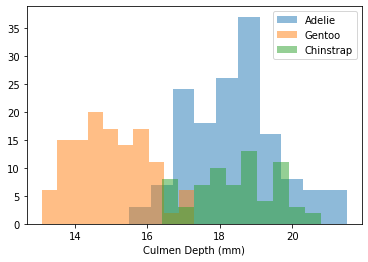

In [9]:
# Making a histogram grouped by species, of Culmen Depths

fig,ax=plt.subplots(1)
ax.set(xlabel="Culmen Depth (mm)")

# sets species as a set of the three specires of penguins
species= set(penguins['Species'])
for s in species:
    # subdivides data by species iterating through set s
    sub=penguins[penguins['Species']==s]
    # drops nan values
    sub=sub["Culmen Depth (mm)"].dropna()
    ax.hist(sub, label=s.split(' ')[0], alpha=.5)
    ax.legend()

The Histogram shows that there is great variation between species when it comes to the **Culmen Depth** as much of the species don't seem to overlap much with others; therefore proving that **Culmen Depth** in fact is an effective quantiative predictor of species.

We also wanted to further prove that Island was a better predictor in comparision to Sex. We used scatterplots in seaborn and looked at *Culmen Length* and *Culmen Depth* based on the Island and then based on Sex.

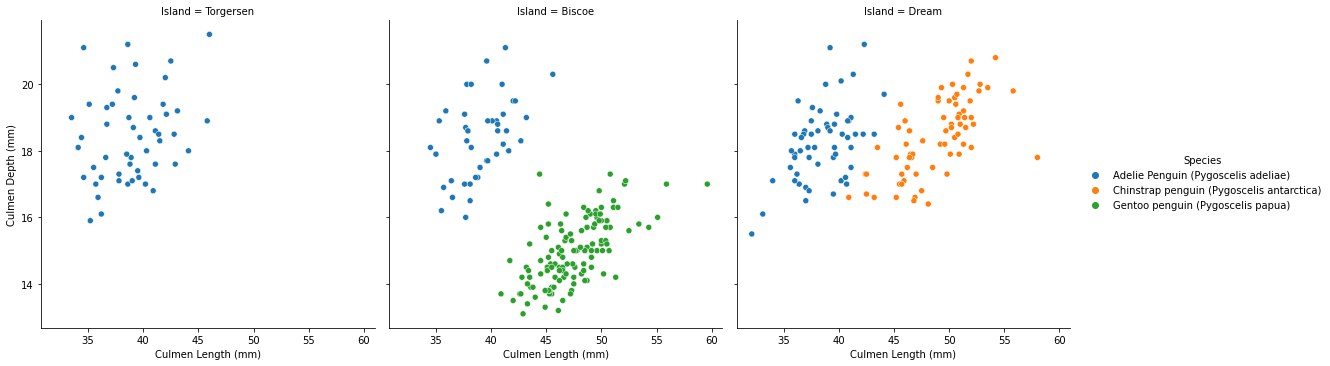

In [10]:
import seaborn as sns
fgrid = sns.relplot(col="Island", x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species',
                   data=penguins)

From the plots we can see that the island yields very distintive groups when plotting *Culmen Length* vs *Culmen Depth* and the data appears to be spread out with clusters in accordance to the different species.

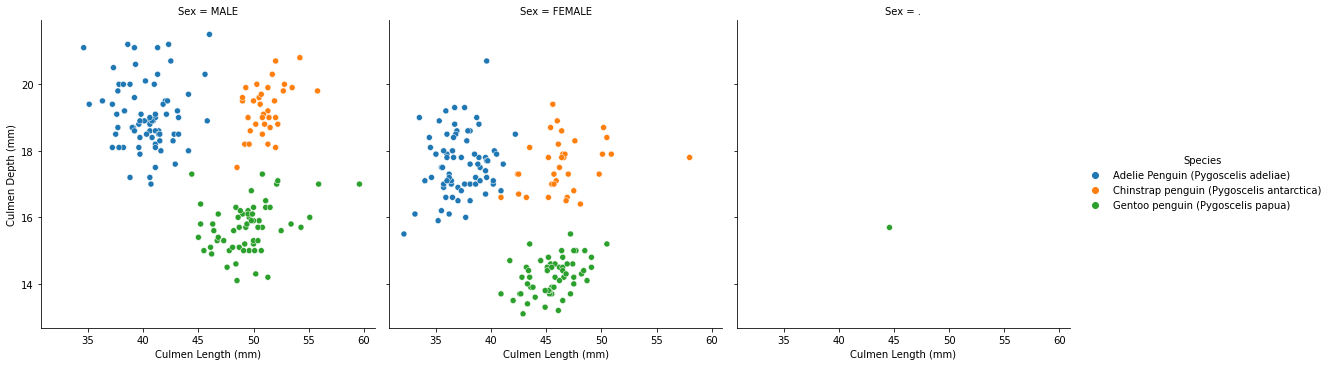

In [62]:
import seaborn as sns
fgrid = sns.relplot(col="Sex", x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species',
                   data=penguins)

*Sex* also yields clusters in accordance to the different species, but these clusters are much closer together and some data even overlap into other clusters, making the species slightly less distinguishable based on sex and therefore is a less effective predictor. Weighing these differences betweeen *Sex* and *Islands*, Islands seemed to be the most effective from the scatterplots and summary tables so we decided to use *Island* as our qualitiative predictor.

In [133]:
# Based on reasoning above, we set best_combo as these three
best_combo = ['Island','Culmen Length (mm)','Culmen Depth (mm)']

We have selected *Island, Culmen Length*, and *Culmen Depth* as the best 3 features to use. With these 3 features and only these 3, we will carry out all of the machine learning.
Below we will prepare the data to be formatted in a way that the machine learning models are able to work with

In [134]:
def prep_data(data): 
    '''
    Preps the data by using the predetermined 3 "best features"
    Splits it into the predictor variables (best 3) and target variable (Species)
    parameter data : data to be preprocessed
    '''
    df=data.copy()
    # fit_transform Island to be numerical instead of names
    le=preprocessing.LabelEncoder() 
    df['Island']=le.fit_transform(df['Island'])  
    
    # alter dataframe copy to be desired features, drop nan values
    df=df[['Species','Island','Culmen Length (mm)','Culmen Depth (mm)']]
    df=df.dropna()
    
    # split into predictor and target variables
    X=df.drop(['Species'],axis=1) 
    y=df['Species']
    return(X,y)

This function was written to prepare the data. Making a copy as to not alter the source data, it transforms the Island into numerical data to work in the machine model. We dropped nan values to allow for smooth computations, and finally split the data frame into predictor variables (Island, Culmen Length, and Culmen Depth) and target variables, which is our ultimate goal to predict the penguin species.

Below we split the data into data to train the machine models (80% of the data) and data to test the models' performants (the remainint 20%)

In [140]:
# Split data into training (80%) and testing (20%)
train,test=train_test_split(penguins,test_size=0.2)

In [141]:
#Used our function prep_data in order to prepare our training and test sets
X_train,y_train=prep_data(train) 
X_test,y_test=prep_data(test)

# Modeling

In this modeling section, we used three machine learning models: *Logistic Regression*, *Decision Tree*, and *Random Forest*. We will demonstrate each one and explain how they function.

We utilized Cross-validation to compute the ideal parameter settings for each of the three mdoels, before training and testing each one on our preselected best three features.

Cross-validation, utilizing specifically k-fold cross validation, works by taking a segment of our training data and using that as a mini test set. The size of this segment can change, depending on the parameters set. We set a mini test set as 20% here. We train the machine learning model on the remaining 80%, and then evaluate on the 20%.
Then, a different 20% of the training data is used as a new test set, with the model trained on a new cut of the training data. This process repeats many times. 
At the end we average the results to get an overall average picture of how the model is expected to perform on the real test set, estimating the optimal complexity of a model.

## Logistic Regression

The first machine learning model we are using is Logistic Regression. Logistic Regression predicts the probability of a categorical variable in order to classify a target variable. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. 
It is useful for our penguins dataset because of its efficiency and accuracy in classification.

Logistic regression is more interpretable and faster. For example, if the purpose of a model is to help others make a decision or if the model is under regulatory scrutiny, logistic regression is easier to explain.

For models with millions of sparse features, logistic regression will be much faster to train and execute and is less prone to overfitting (as are all linear models.)


In [142]:
np.random.seed(2000)

In [143]:
# Using Cross Validation to find best value of LR parameter C
# C is the inverse of regularization strength

best_score = 0 
best_C=0
# testing C values ranging from 0.1 to 2.9 to calculate each CV score
for d in range(1,30):
    LR=LogisticRegression(max_iter=500,C = 0.1*d) 
    cv_score = cross_val_score(LR, X_train[best_combo], y_train, cv=10).mean() 

#update best_C with each new C yielding a higher CV score
if cv_score > best_score:
    best_C = 0.1*d
    best_score = cv_score
    
print(best_score,best_C)

0.9818783068783068 2.9000000000000004


Using cross-validation to select the criteria for this candidate model, this for-loop found that in the range tested 2.9 was the best C value to use, giving a CV score of 0.98 on the training data. We then *score* our model to see how we did in terms of accuracy. The *score* method requires both the predictor and target variables.

In [144]:
# conduct Logistic Regression with the best C and the best combo of features
LR=LogisticRegression(max_iter=500,C = best_C)
LR.fit(X_train[best_combo],y_train) 
LR.score(X_test[best_combo],y_test)

0.9705882352941176

The score is the fraction of the time that the model made the correct prediction of species. Our Logistic Regression model was able to use the predictor variables *Culmen Length* and *Culmen Depth* to be correct nearly <font color="green">*97%*</font> of the time in predicting a penguin's species for our `test` data set.

## Decision Tree

Decision Trees are the second machine model we are using. They are a supervised learning method which work well for both classification (which we are acomplishing) and regression. By learning decision ruled from the training data, the tree will predict the value of a target variable. A tree functions like a piecewise constant approximation. 
 
For example, with the feature Island, it can see what island a penguin lives on and narrow down its decisions. This works well with the data, because our features are grouped together nicely, as seen in out explroatory analysis graphs.

Trees are understandable and easy to visualize, but can lead to overfitting of data if the maximum depth is too great. We check this issue with cross-validation.

In [145]:
np.random.seed(2000)

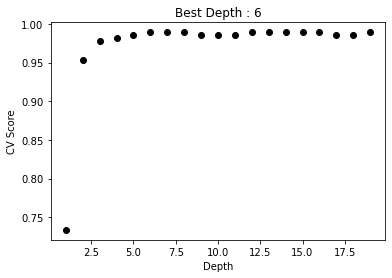

In [146]:
# Using Cross Validation to find best value of DecisionTree parameter max_depth

# making a graph for a scatterplot, a visual way to see the best max_depth
fig, ax = plt.subplots(1) 
best_score = 0 

# for-loop testing max_depth values from 1-19 using the best_combo
for d in range(1,20):
    T = tree.DecisionTreeClassifier(max_depth = d) 
    cv_score = cross_val_score(T, X_train[best_combo], y_train, cv=10).mean() 
    ax.scatter(d, cv_score, color = "black")
    #update best_depth with each new depth yielding a higher CV score
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score
    
l = ax.set(title = "Best Depth : " + str(best_depth), 
           xlabel = "Depth",
           ylabel = "CV Score")

Using cross-validation to select the highest-scoring Max Depth for criteria for this decision tree candidate model, this for-loop found that in the best depth to use was 6, giving a CV score of 0.982 on the training data

In [147]:
T=tree.DecisionTreeClassifier(max_depth=best_depth)
T.fit(X_train[best_combo],y_train) 
T.score(X_test[best_combo],y_test)

0.9852941176470589

The score is the fraction of the time that the model made the correct prediction of species. Our DecisionTree model was able to use the predictor variables *Culmen Length* and *Culmen Depth* to be correct nearly <font color="green">*99%*</font> of the time in predicting a penguin's species for our `test` data set.

## Random Forest 

Random Forests are the last machine model we are using. Random Forest is a supervised learning algorithm  that builds off of decision trees. 

Random Forests work by training many different decision trees(which combines some decisions) and then deciding on the ultimate, best prediction based on the results of the predictions from all the different decision trees trained. Because Random Forest is a bunch of decision trees, we also decided to find a best depth for the Random Forest Algorithm in addition to finding the best depth in our previous Decision Tree model. 

By using the best depth of the trees, we ensure that the algorithm ouputs the highest possible accuracy possible using the trees and our chosen features. Random Forests are effective with the palmer penguins dataset as many decision trees and the randomness of selection of features allows the predictions for more generalization over the data set. Hence, in the case of the penguins dataset Random Forest is great at avoiding overfitting and therefore is also a good indicator as a model.


In [148]:
np.random.seed(2000)

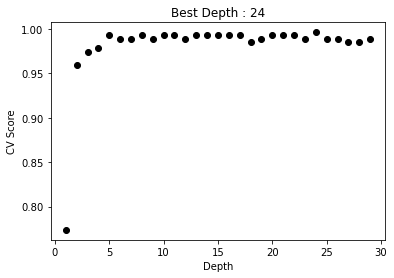

In [149]:
# Using Cross Validation to find best value of Random Forest's parameter max_depth

# making a graph for a scatterplot, a visual way to see the best max_depth
fig, ax = plt.subplots(1) 
best_score = 0 
best_depth=1

# for-loop testing max_depth values from 1-29 using the best_combo
for d in range(1,30):
    m = RandomForestClassifier(max_depth=d) 
    cv_scores=cross_val_score(m,X_train[best_combo],y_train,cv=5).mean() 
    ax.scatter(d, cv_scores, color = "black")
    #update best_depth with each new depth yielding a higher CV score
    if cv_scores>best_score:
        best_depth=d 
        best_score=cv_scores
l = ax.set(title = "Best Depth : " + str(best_depth), 
           xlabel = "Depth",
           ylabel = "CV Score")

Utilizing cross-validation to select the highest-scoring Max Depth for criteria for this Random Forest candidate model, this for-loop found that in the best depth to use was 24

In [150]:
m = RandomForestClassifier(max_depth=best_depth) 
#cv_scores=cross_val_score(m, X_train[best_combo], y_train,cv=5).mean() 
m.fit(X_train[best_combo], y_train)
m.score(X_test[best_combo], y_test)

0.9852941176470589

The score is the fraction of the time that the model made the correct prediction of species. Our Random Forest model was able to use the predictor variables *Culmen Length* and *Culmen Depth* to be correct nearly <font color="green">*99%*</font> of the time in predicting a penguin's species for our `test` data set.

# Discussion

After running our models with our selected predictors, we were able to generate pleasing results for their performance.
All three of our models were able to perform highly.  As we tested and retested the models, there was some variation in the scores because when the data is split into training and testing sets there is some random variation. However, all three models were regularly producing test scores higher than 0.95, which is an indication that the models and features we selected were very good and applicable to our penguin situation.

We did notice some differences between the models in their performances. Logistic Regression, while still performing very high, performed slightly lower than other two models. This could be due to the functions of logistic regression being marginally less suitable for the way our data was split up, but our data is still very compatible with this method. Logistic regression will linearly separate the data, adding a figurative boundary between classification groups, which can be visualized on our scatterplot figures in the Exploratory Analysis. Logistic regression was able to work very efficiently as well, because on its own it is a powerful method that can be used in our data.

In the Decision tree, we were able to attain an even higher score. 
Due to the way our data was split up, a decision tree was highly suitable for our model. In general, Decision trees handle colinearity in the data better than Logistic Regression. Additionally Decision trees supports non linearity, and can be better for categorical values than Logistic Regression. Additionally, our qualitative predictor variable of Island performs very well with decision trees.

Random Forests work in a way similar to many decision trees running at once. As our results show, with our data the Random Forest performed very highly, similar to the Decision tree. Random Forests work very well with categorical data, and can discover more complex relationships in the data. However, because Random forests use so many branches and has more complexity, they take more time. This was apparent when we ran the code repeatedly, because the Random forest always took significantly more time to run than the other two. Because of this, we would not recommend using this if the data got much bigger or of the code was more complex and required efficiency.

Overall, we found that using the combination of features Island, Culmen Length, and Culmen Depth on the Decision Tree model performs the highest, and is what we would recommend to use. Decision trees are very good at handling categorical data, so one possible improvement to the model could be adding another qualitative variable.
One danger to be aware of with decision trees is overfitting. If the decision tree has a max depth too great or uses too many features, it can model the training data too perfectly and then fail on any other data. With more quantitative data, the decision tree might fall short, in which case logistic regression could become more apropriate for the modeling.

Overall, we conclude that the data was very compatible with these machine learning models, and based on our exploratory graphs and tables the three features we chose work very well to classify the data. We can say with a fair amount of confidence that if this Penguin Apocalypse happens anytime soon, we will be prepared.